<a href="https://colab.research.google.com/github/cfcastillo/DS-6-Notebooks/blob/main/Education_Capstone_MS3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Definition

The purpose of this project is to identify what factors influence people to choose certain professions or trades. In understanding these factors, we can help colleges like Central New Mexico College (CNM) offer courses that support those professions and better target their marketing to people who are likely to choose those professions.

This project will be a supervised categorization problem using tree-based models to identify the factors that will contribute to career choice.

**TODO: Start with 2019 and then, if time, see how covid has affected numbers in 2020 and 2021.**

**TODO: If time, parse 2018 and prior to compare years**



# Data Identification Process

Steps:

1. We stated several questions we wanted answered (target). 
1. After defining our problem, we listed sets of variables that we believed could answer our questions. We then put the variables and targets into a [spreadsheet](https://docs.google.com/spreadsheets/d/1bOhOBHKOae9TDN9n9-xF7ag4QW_Z0c7HXTYLXeMMLHs/edit#gid=0) to define the dataset we would need to run our analysis. 
1. We then researched data sources such as Bureau of Labor Statistics and the US Census to locate data that supported our research. 
1. We then mapped the columns in the data sources to the columns in our desired dataset and linked multiple datasets by target code value.

*Note: The data identification process is still a work in progress. As we proceed with EDA, we will discover some columns are not needed and others are needed. As we analyzed the data during the data cleaning process, we discovered that earnings are complex, often made up of multiple jobs. Additional analysis will be needed to solidify our predictor when applying the model.*

# Data Collection

The following data sources were used for this project. Data was imported into Google Drive from the below links and modified as needed to support this project.

The primary datasets for this project were initially taken from the Census' [Annual Social and Economic Supplement (ASEC)](https://www.census.gov/programs-surveys/saipe/guidance/model-input-data/cpsasec.html) of the Current Population Survey (CPS) for 2020. However, because 2020 was anomalous due to Covid, we chose to go back and take data from 2019 - pre-covid to get occupation and salary information that was more stable. Per the above link, the "*ASEC data is the source of timely official national estimates of poverty levels and rates and of widely used measures of income. It provides annual estimates based on a survey of more than 75,000 households. The survey contains detailed questions covering social and economic characteristics of each person who is a household member as of the interview date. Income questions refer to income received during the previous calendar year.*"

[Annual Social and Economic Survey (ASEC) All Years Data](https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.html)

* Contains links to all years from 2010 to 2021. CSV format available from 2019 to 2021. Prior to 2019, a fixed format file is provided so columns would need to be parsed using the available data dictionary.
* [2021 Survey - csv](https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.2021.html)
* [2020 Survey - csv](https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.2020.html)
* [2019 Survey - csv](https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.2019.html)
* [2018 Survey - dat](https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.2018.html) - Need to convert to csv

[Quarterly Census of Employment and Wages](https://www.bls.gov/cew/about-data/)

* Source data for OES Statistics. Can be used if detailed data is needed.

[Occupational Employment Wage Statistics (OES) Data](https://data.bls.gov/oes/#/geoOcc/Multiple%20occupations%20for%20one%20geographical%20area)

* Format - Excel converted to CSV
* Contains Occupational codes and aggregated statistics on wages for those occupations.

[FIPS State Codes](https://www.census.gov/library/reference/code-lists/ansi/ansi-codes-for-states.html)

* Format - Copied from PDF and converted to CSV
* Contains FIPS State codes mapped to US Postal Service (USPS) State codes.

[Census Occupation Codes](https://www2.census.gov/programs-surveys/cps/techdocs/cpsmar20.pdf)

* Format - Copied from PDF and converted to CSV
* Contains Census Occupation codes mapped to Federal Standard Occupational Classification (SOC) Codes.

[Bureau of Labor Statistics SOC Codes](https://www.bls.gov/oes/current/oes_stru.htm#15-0000)

* Format - list on website

[Potential CNM Enrollment Data](https://www.cnm.edu/depts/finance-operations/ods/institutional-research-request)


## CNM Data Links

[KPIs PDF](https://www.cnm.edu/depts/finance-operations/ods/dashboards-kpis/kpiupdate1120.pdf)

[CNM Data Dashboard](https://livecnm.sharepoint.com/sites/insights/FO/ODS/CNMdashboards/SitePages/Home.aspx?e=1%3Aa3207ba35cac40c480e6029dc0bfcc2c)

[CNM Graduate Outcomes](https://www.cnm.edu/depts/finance-operations/ods/documents/graduate-surveys/2018-2019-graduate-outcomes.pdf)

## Summarized Data Dictionary

[Here is a link to a summarized data dictionary.](https://docs.google.com/document/d/1io7TtqebJLtw6FKE7zkbUh26QkG3rEJrZX3Fver9zmU/edit)


# Imports

In [ ]:
# grab the imports needed for the project
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

# all
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
import sklearn.model_selection as model_selection

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Globals
The team had different data links. The global here is to allow team members to specify who is working on this notebook so that they can run the code in their environment.

In [ ]:
# Expected values are: ellie, amy, cecilia - lowercase
team_member = 'ellie'

# Root drive path
if team_member == 'ellie':
  root_drive = '/content/drive/MyDrive/'
else:
  root_drive = '/content/drive/MyDrive/Student Folder - Cecilia/Projects/'

# Data Cleaning

Once we identified the data elements needed for our project and the data sources that provided those data elements, the following steps were taken to get the data into a format needed for our analysis.

1. Downloaded data from data sources and placed copies in Google Drive.
1. Made changes to raw data where needed to support the project. 
  * Added State code to OES data and remove headers and footers from the data.
  * Created lookup data for State codes and SOC codes so secondary data sources could be merged with primary Census data. This involved cleaning the census code list so it could be properly parsed.
1. Converted codes in secondary datasets into Census codes.
1. Merged all datasets together into a single dataset.
1. Removed data that did not meet criteria for our analysis
  * Removed anyone under age 16.
  * Imputed null values.
1. Studied earnings/salary columns to determine which columns provided values that could be used for modeling. Added in columns that were missing from the initial analysis.
1. We were not able to reliably match the OES data to the census data using the full SOC Code because of disparities in SOC Codes. Therefore, we executed 3 matching passes reducing the SOC code by one character each time and pulling the largest Census code for the SOC code prefix. This allowed us to match XX % of the data.

TODO: REFINE AS PROJECT PROGRESSES.

## Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Census data
asec_year = '19'
asec_path = root_drive + 'Capstone/Data/ASEC/asecpub' + asec_year + 'csv/'
asec_data_person = pd.read_csv(asec_path + 'pppub' + asec_year + '.csv')
asec_data_household = pd.read_csv(asec_path + 'hhpub' + asec_year + '.csv')

# TODO: once all data is available, join 1x and then save combined file so don't have to join every time code is run.
# Join and import all 50 states' occupation data
oes_path = root_drive + 'Capstone/Data/Occupations/'
oes_file_names = glob.glob(oes_path + "*.csv")
li = []
for filename in oes_file_names:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
oes_data = pd.concat(li, axis=0, ignore_index=True)

# File path for all code conversion files.
codes_path = root_drive + 'Capstone/Data/Codes/'

# Import FIPS state codes so we can convert USPS state to FIPS state to match back to Census data.
fips_state_codes = pd.read_csv(codes_path + 'FIPS_STATE_CODES.csv')

# Import Census occupational codes so we can convert SOC codes into Census Occ codes.
# Is in fixed width format. Will parse out data below.
census_occ_codes = pd.read_fwf(codes_path + 'CENSUS_SOC_OCC_CODES.txt')

In [ ]:
# How many columns and rows do we have in each dataset?
print(f'Person data: {asec_data_person.shape}')
print(f'Household data: {asec_data_household.shape}')
print(f'Occupation data: {oes_data.shape}')
print(f'FIPS State Codes: {fips_state_codes.shape}')
print(f'Census Occ Codes: {census_occ_codes.shape}')

Person data: (180101, 799)
Household data: (94633, 135)
Occupation data: (35822, 19)
FIPS State Codes: (56, 3)
Census Occ Codes: (530, 1)


## ASEC Data

### Define ASEC Columns

The following data dictionary provides details for the selected columns.

[ASEC Appendices](https://www2.census.gov/programs-surveys/cps/techdocs/cpsmar19.pdf)

[ASEC Data Dictionary](https://www2.census.gov/programs-surveys/cps/datasets/2019/march/06_ASEC_2019-Data_Dictionary_Full.pdf)


In [ ]:
# Get lists of columns for various datasets that will be used for the project
# Note: Columns can be added as needed here and will propagate through the project.
id_col = ['H_IDNUM']
person_cols = ['OCCUP','A_DTOCC','AGE1','A_SEX','PRDTRACE','PXRACE1','PRCITSHP',
               'A_HGA','PRERELG', 'A_GRSWK', 'HRCHECK','HRSWK','PEARNVAL','A_CLSWKR','WEIND',
               'A_MARITL']
household_cols = ['GTMETSTA','GEDIV','GESTFIPS','HHINC','H_TENURE']

### Get Household Id

In [ ]:
# Extract the Household id number from the person record so we can join the household and person dataframes by this id.
asec_data_person['H_IDNUM'] = asec_data_person['PERIDNUM'].str[:20]

In [ ]:
# View Person Data
asec_data_person[person_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180101 entries, 0 to 180100
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   OCCUP     180101 non-null  int64
 1   A_DTOCC   180101 non-null  int64
 2   AGE1      180101 non-null  int64
 3   A_SEX     180101 non-null  int64
 4   PRDTRACE  180101 non-null  int64
 5   PXRACE1   180101 non-null  int64
 6   PRCITSHP  180101 non-null  int64
 7   A_HGA     180101 non-null  int64
 8   PRERELG   180101 non-null  int64
 9   A_GRSWK   180101 non-null  int64
 10  HRCHECK   180101 non-null  int64
 11  HRSWK     180101 non-null  int64
 12  PEARNVAL  180101 non-null  int64
 13  A_CLSWKR  180101 non-null  int64
 14  WEIND     180101 non-null  int64
 15  A_MARITL  180101 non-null  int64
dtypes: int64(16)
memory usage: 22.0 MB


In [ ]:
# Look at first 5 records of selected columns of person data.
asec_data_person[person_cols].head()

,OCCUP,A_DTOCC,AGE1,A_SEX,PRDTRACE,PXRACE1,PRCITSHP,A_HGA,PRERELG,A_GRSWK,HRCHECK,HRSWK,PEARNVAL,A_CLSWKR,WEIND,A_MARITL
0,4050,13,4,1,1,0,1,37,0,0,1,30,18000,1,18,7
1,0,0,17,2,1,0,1,39,0,0,0,0,0,0,23,4
2,4020,13,13,2,1,0,1,39,0,0,2,44,12000,1,18,7
3,0,0,16,2,1,0,1,39,0,0,0,0,0,0,23,5
4,4610,15,8,1,1,0,1,39,0,0,1,20,12000,1,16,7


In [ ]:
# View Household Data
asec_data_household[household_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94633 entries, 0 to 94632
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   GTMETSTA  94633 non-null  int64
 1   GEDIV     94633 non-null  int64
 2   GESTFIPS  94633 non-null  int64
 3   HHINC     94633 non-null  int64
 4   H_TENURE  94633 non-null  int64
dtypes: int64(5)
memory usage: 3.6 MB


In [ ]:
# Look at first 5 records of household data
asec_data_household[household_cols].head()

,GTMETSTA,GEDIV,GESTFIPS,HHINC,H_TENURE
0,2,1,23,0,0
1,2,1,23,0,0
2,2,1,23,0,0
3,2,1,23,8,1
4,2,1,23,0,0


### Merge Person and Household Records

In [ ]:
# Join Household and Personal records into single dataframe
# Inner join - should not have person without household.
asec_combined = pd.merge(asec_data_household[id_col + household_cols], asec_data_person[id_col + person_cols], on=id_col)

In [ ]:
# View combined result
asec_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180101 entries, 0 to 180100
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   H_IDNUM   180101 non-null  object
 1   GTMETSTA  180101 non-null  int64 
 2   GEDIV     180101 non-null  int64 
 3   GESTFIPS  180101 non-null  int64 
 4   HHINC     180101 non-null  int64 
 5   H_TENURE  180101 non-null  int64 
 6   OCCUP     180101 non-null  int64 
 7   A_DTOCC   180101 non-null  int64 
 8   AGE1      180101 non-null  int64 
 9   A_SEX     180101 non-null  int64 
 10  PRDTRACE  180101 non-null  int64 
 11  PXRACE1   180101 non-null  int64 
 12  PRCITSHP  180101 non-null  int64 
 13  A_HGA     180101 non-null  int64 
 14  PRERELG   180101 non-null  int64 
 15  A_GRSWK   180101 non-null  int64 
 16  HRCHECK   180101 non-null  int64 
 17  HRSWK     180101 non-null  int64 
 18  PEARNVAL  180101 non-null  int64 
 19  A_CLSWKR  180101 non-null  int64 
 20  WEIND     180101 non-null 

In [ ]:
asec_combined.head()

,H_IDNUM,GTMETSTA,GEDIV,GESTFIPS,HHINC,H_TENURE,OCCUP,A_DTOCC,AGE1,A_SEX,PRDTRACE,PXRACE1,PRCITSHP,A_HGA,PRERELG,A_GRSWK,HRCHECK,HRSWK,PEARNVAL,A_CLSWKR,WEIND,A_MARITL
0,01000691245394308011,2,1,23,8,1,4050,13,4,1,1,0,1,37,0,0,1,30,18000,1,18,7
1,39994039016100209011,2,1,23,9,2,0,0,17,2,1,0,1,39,0,0,0,0,0,0,23,4
2,91193400932060909011,2,1,23,5,2,4020,13,13,2,1,0,1,39,0,0,2,44,12000,1,18,7
3,14103203009699909011,2,1,23,10,2,0,0,16,2,1,0,1,39,0,0,0,0,0,0,23,5
4,14103203009699909011,2,1,23,10,2,4610,15,8,1,1,0,1,39,0,0,1,20,12000,1,16,7


## OES Data

In [ ]:
# Shorten column names
oes_data.rename(columns={'State':'USPS_STATE',
                         'Occupation (SOC code)':'SOC_DESC',
                         'Employment(1)':'EMP',
                         'Employment percent relative standard error(3)':'EMP_RSDE',
                         'Hourly mean wage':'HOURLY_MEAN',
                         'Annual mean wage(2)':'ANN_MEAN',
                         'Wage percent relative standard error(3)':'WAGE_RSDE',
                         'Hourly 10th percentile wage':'HOURLY_10TH',
                         'Hourly 25th percentile wage':'HOURLY_25TH',
                         'Hourly median wage':'HOURLY_MEDIAN',
                         'Hourly 75th percentile wage':'HOURLY_75TH',
                         'Hourly 90th percentile wage':'HOURLY_90TH',
                         'Annual 10th percentile wage(2)':'ANN_10TH',
                         'Annual 25th percentile wage(2)':'ANN_25TH',
                         'Annual median wage(2)':'ANN_MEDIAN',
                         'Annual 75th percentile wage(2)':'ANN_75TH',
                         'Annual 90th percentile wage(2)':'ANN_90TH',
                         'Employment per 1,000 jobs':'EMP_PER_1000',
                         'Location Quotient':'LOC_QUOTIENT'}, inplace=True)

### OES Column Footnotes

* (1) Estimates for detailed occupations do not sum to the totals because the totals include occupations not shown separately. Estimates do not include self-employed workers.
* (2) Annual wages have been calculated by multiplying the corresponding hourly wage by 2,080 hours.
* (3) The relative standard error (RSE) is a measure of the reliability of a survey statistic. The smaller the relative standard error, the more precise the estimate.
* (4) Wages for some occupations that do not generally work year-round, full time, are reported either as hourly wages or annual salaries depending on how they are typically paid.
* (5) This wage is equal to or greater than \$100.00 per hour or \$208,000 per year.
* (8) Estimate not released.

In [ ]:
# OES columns we want to keep
# occupation_cols = ['HOURLY_MEAN','HOURLY_MEDIAN','EMP_PER_1000','LOC_QUOTIENT']
occupation_cols = ['HOURLY_MEAN','HOURLY_MEDIAN','EMP_PER_1000','LOC_QUOTIENT', 'ANN_MEAN','ANN_MEDIAN']
# 2   EMP            35874 non-null  object
#  3   EMP_RSDE       35874 non-null  object
#  4   HOURLY_MEAN    35874 non-null  object
#  5   ANN_MEAN       35874 non-null  object
#  6   WAGE_RSDE      35874 non-null  object
#  7   HOURLY_10TH    35874 non-null  object
#  8   HOURLY_25TH    35874 non-null  object
#  9   HOURLY_MEDIAN  35874 non-null  object
#  10  HOURLY_75TH    35874 non-null  object
#  11  HOURLY_90TH    35874 non-null  object
#  12  ANN_10TH       35874 non-null  object
#  13  ANN_25TH       35874 non-null  object
#  14  ANN_MEDIAN     35874 non-null  object
#  15  ANN_75TH       35874 non-null  object
#  16  ANN_90TH       35874 non-null  object
#  17  EMP_PER_1000   35874 non-null  object
#  18  LOC_QUOTIENT   35874 non-null  object

### Get Census State Codes

In [ ]:
# Import FIPS state codes matching on USPS state codes
# Left Join - keep OES data even if no match on state code.
oes_data_st = pd.merge(oes_data, fips_state_codes[['USPS_STATE','FIPS_STATE']], on='USPS_STATE', how='left')

In [ ]:
# Verify merge was successful - that we have expected columns and record count is unchanged.
oes_data_st.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35822 entries, 0 to 35821
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   USPS_STATE     35822 non-null  object
 1   SOC_DESC       35822 non-null  object
 2   EMP            35822 non-null  object
 3   EMP_RSDE       35822 non-null  object
 4   HOURLY_MEAN    35822 non-null  object
 5   ANN_MEAN       35822 non-null  object
 6   WAGE_RSDE      35822 non-null  object
 7   HOURLY_10TH    35822 non-null  object
 8   HOURLY_25TH    35822 non-null  object
 9   HOURLY_MEDIAN  35822 non-null  object
 10  HOURLY_75TH    35822 non-null  object
 11  HOURLY_90TH    35822 non-null  object
 12  ANN_10TH       35822 non-null  object
 13  ANN_25TH       35822 non-null  object
 14  ANN_MEDIAN     35822 non-null  object
 15  ANN_75TH       35822 non-null  object
 16  ANN_90TH       35822 non-null  object
 17  EMP_PER_1000   35822 non-null  object
 18  LOC_QUOTIENT   35822 non-n

In [ ]:
# Verify we have all states
oes_data_st[['USPS_STATE', 'FIPS_STATE']].value_counts()

USPS_STATE  FIPS_STATE
CA          6             797
TX          48            794
FL          12            790
NY          36            785
OH          39            775
PA          42            775
IL          17            775
WA          53            756
MI          26            753
TN          47            751
GA          13            749
VA          51            748
IN          18            747
OR          41            744
MN          27            742
CO          8             742
NC          37            741
MD          24            739
NJ          34            738
MA          25            735
MO          29            733
WI          55            731
AL          1             731
LA          22            730
AZ          4             729
OK          40            712
IA          19            711
KY          21            709
UT          49            705
SC          45            696
MS          28            688
KS          20            685
CT          9    

In [ ]:
# Verify no nulls after merge.
oes_data_st.isnull().sum()

USPS_STATE       0
SOC_DESC         0
EMP              0
EMP_RSDE         0
HOURLY_MEAN      0
ANN_MEAN         0
WAGE_RSDE        0
HOURLY_10TH      0
HOURLY_25TH      0
HOURLY_MEDIAN    0
HOURLY_75TH      0
HOURLY_90TH      0
ANN_10TH         0
ANN_25TH         0
ANN_MEDIAN       0
ANN_75TH         0
ANN_90TH         0
EMP_PER_1000     0
LOC_QUOTIENT     0
FIPS_STATE       0
dtype: int64

### Parse SOC Codes

In [ ]:
# Parse out SOC code from the description. The code is inside parentheses.
def getSocCode(value):
  # If not able to parse the code, then return the value from the file.
  try:
    return value[value.index('(')+1:value.index(')')]
  except:
    return value

oes_data_st['SOC_CODE'] = oes_data_st['SOC_DESC'].apply(lambda val: getSocCode(val))

In [ ]:
# Verify codes were properly parsed
oes_data_st[['SOC_DESC','SOC_CODE']]

,SOC_DESC,SOC_CODE
0,All Occupations(000000),000000
1,Management Occupations(110000),110000
2,Chief Executives(111011),111011
3,General and Operations Managers(111021),111021
4,Legislators(111031),111031
...,...,...
35817,Gas Compressor and Gas Pumping Station Operato...,537071
35818,"Pump Operators, Except Wellhead Pumpers(537072)",537072
35819,Wellhead Pumpers(537073),537073
35820,Refuse and Recyclable Material Collectors(537081),537081


In [ ]:
# Create colums with soc code 1st 5 chars and 1st 4 chars for joining in cases where match is not found on full SOC code.
oes_data_st['SOC_CODE5'] = oes_data_st['SOC_CODE'].str[:5]
oes_data_st['SOC_CODE4'] = oes_data_st['SOC_CODE'].str[:4]

### Get Census Occupation Codes

In [ ]:
# Prepare Census/SOC map file. Codes are embedded in a single column so need to be parsed out.
# Parse out Census and SOC occupational codes from the description. The code has a dash in it. So locate by dash
# assuming there are no dashes in the description.
def getOccCodeSoc(value):
  # If not able to parse the code, then return the value from the file.
  try:
    return value[value.index('-')-2:value.index('-')+5].replace('-','')
  except:
    return value

# Retrieve first 4 characters in the file. This is the Census code.
def getOccCodeCensus(value):
  return value[:4]

census_occ_codes['OCCUP'] = census_occ_codes['CENSUS_MAP'].apply(lambda val: getOccCodeCensus(val))
census_occ_codes['SOC_CODE'] = census_occ_codes['CENSUS_MAP'].apply(lambda val: getOccCodeSoc(val))
census_occ_codes

,CENSUS_MAP,OCCUP,SOC_CODE
0,0010 Chief executives 11-1011,0010,111011
1,0020 General and operations managers 11-1021,0020,111021
2,0040 Advertising and promotions managers 11-2011,0040,112011
3,0051 Marketing Managers 11-2021,0051,112021
4,0052 Sales managers 11-2022,0052,112022
...,...,...,...
525,9645 Stockers and order fillers 53-7065,9645,537065
526,9650 Pumping station operators 53-7070,9650,537070
527,9720 Refuse and recyclable material collectors...,9720,537081
528,9760 Other material moving workers 53-7199,9760,537199


In [ ]:
# TODO: determine if needed. This is a work in progress.
# There are some cases where we do not have an exact match on the full SOC Code.
# In such cases, try to match on the first 5 characters, taking the largest Occ code in case
# there are multiple Occ codes associated with the first 5 characters of SOC Code.
census_occ_codes['SOC_CODE5'] = census_occ_codes['SOC_CODE'].str[:5]
census_occ_codes_soc5 = census_occ_codes.groupby("SOC_CODE5").agg({
    'OCCUP':['max']
}).reset_index()

# Repeat the process using the first 4 characters of SOC Code.
census_occ_codes['SOC_CODE4'] = census_occ_codes['SOC_CODE'].str[:4]
census_occ_codes_soc4 = census_occ_codes.groupby("SOC_CODE4").agg({
    'OCCUP':['max']
}).reset_index()

# Rename aggregated multi-level columns for joining data
census_occ_codes_soc5.columns = census_occ_codes_soc5.columns.droplevel(0)
census_occ_codes_soc5.columns=['SOC_CODE5','OCCUP5']
census_occ_codes_soc4.columns = census_occ_codes_soc4.columns.droplevel(0)
census_occ_codes_soc4.columns=['SOC_CODE4','OCCUP4']

In [ ]:
census_occ_codes_soc5.head()

,SOC_CODE5,OCCUP5
0,11101,0010
1,11102,0020
2,11201,0040
3,11202,0052
4,11203,0060


In [ ]:
census_occ_codes_soc4.head()

,SOC_CODE4,OCCUP4
0,1110,0020
1,1120,0060
2,1130,0160
3,1131,0137
4,1190,0340


In [ ]:
# Convert SOC Code into Census occupation code
# Left Join - keep OES data even if no match on state code.
oes_data_census = pd.merge(oes_data_st, census_occ_codes[['OCCUP','SOC_CODE']], on='SOC_CODE', how='left')

In [ ]:
oes_data_census.shape

(35924, 24)

In [ ]:
# Do 2 more passes needed to match. If still largely unmatched with Census code, then will use census
#   major and detailed categories instead and will forego OES statistics.

# First pass - join on SOC first 5 chars. 
# Before - 17002/35924
# 1st pass - 5151/35924
# 2nd pass - 1792/35924

# Match on first 5 chars of SOC Code
oes_data_census = pd.merge(oes_data_census[oes_data_census['OCCUP'].isnull()], census_occ_codes_soc5, on='SOC_CODE5', how='left')
# Match on first 4 chars of SOC Code
oes_data_census = pd.merge(oes_data_census[oes_data_census['OCCUP'].isnull()], census_occ_codes_soc4, on='SOC_CODE4', how='left')
# Copy codes into OCCUP column where OCCUP is still null
oes_data_census['OCCUP'].fillna(oes_data_census['OCCUP5'], inplace=True)
oes_data_census['OCCUP'].fillna(oes_data_census['OCCUP4'], inplace=True)

In [ ]:
# Verify results after filling values. Still have 1792 empty.
oes_data_census[oes_data_census['OCCUP'].isnull()]

,USPS_STATE,SOC_DESC,EMP,EMP_RSDE,HOURLY_MEAN,ANN_MEAN,WAGE_RSDE,HOURLY_10TH,HOURLY_25TH,HOURLY_MEDIAN,HOURLY_75TH,HOURLY_90TH,ANN_10TH,ANN_25TH,ANN_MEDIAN,ANN_75TH,ANN_90TH,EMP_PER_1000,LOC_QUOTIENT,FIPS_STATE,SOC_CODE,SOC_CODE5,SOC_CODE4,OCCUP,OCCUP5,OCCUP4
0,AL,All Occupations(000000),1903210,0.5,22.52,46840,0.6,8.98,11.57,17.43,27.39,41.07,18690,24060,36250,56980,85430,1000.000,1.00,1,000000,00000,0000,NaN,NaN,NaN
1,AL,Management Occupations(110000),87110,1.2,52.90,110040,0.7,22.95,32.37,45.73,64.58,91.89,47740,67330,95120,134320,191130,45.772,0.80,1,110000,11000,1100,NaN,NaN,NaN
10,AL,Business and Financial Operations Occupations(...,81600,1.2,35.97,74820,0.7,18.20,23.77,31.99,44.31,57.44,37860,49450,66540,92170,119480,42.876,0.71,1,130000,13000,1300,NaN,NaN,NaN
20,AL,Computer and Mathematical Occupations(150000),45070,4.1,41.69,86720,1.2,20.73,28.15,39.06,52.81,67.94,43120,58550,81250,109850,141320,23.679,0.72,1,150000,15000,1500,NaN,NaN,NaN
27,AL,Architecture and Engineering Occupations(170000),45130,2.3,43.70,90900,2.9,20.92,29.22,40.64,56.63,71.04,43510,60780,84530,117800,147760,23.711,1.31,1,170000,17000,1700,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16921,WY,"Farming, Fishing, and Forestry Occupations(450...",640,10.1,15.41,32060,3.0,9.77,12.70,15.07,17.15,22.40,20310,26410,31340,35670,46590,2.432,0.71,56,450000,45000,4500,NaN,NaN,NaN
16926,WY,Construction and Extraction Occupations(470000),27000,2.4,26.42,54960,1.1,16.23,19.39,24.94,31.86,39.23,33760,40330,51870,66270,81590,103.157,2.42,56,470000,47000,4700,NaN,NaN,NaN
16951,WY,"Installation, Maintenance, and Repair Occupati...",17080,2.9,28.43,59130,1.1,15.18,19.85,26.74,36.33,45.68,31580,41290,55610,75580,95010,65.259,1.65,56,490000,49000,4900,NaN,NaN,NaN
16966,WY,Production Occupations(510000),12640,3.0,27.88,58000,1.7,13.58,17.77,25.10,37.16,47.49,28250,36970,52200,77280,98790,48.294,0.79,56,510000,51000,5100,NaN,NaN,NaN


## Combine All Data

In [ ]:
# Bring in Occupational data joining on FIPS state and full SOC code.
# Convert to numeric datatypes so data can be merged.
oes_data_census['FIPS_STATE'] = pd.to_numeric(oes_data_census['FIPS_STATE'], errors='coerce')
oes_data_census['OCCUP'] = pd.to_numeric(oes_data_census['OCCUP'], errors='coerce')

# Left Join - keep OES data even if no match on state code.
asec_oes = pd.merge(asec_combined, oes_data_census, left_on=['GESTFIPS','OCCUP'], right_on=['FIPS_STATE','OCCUP'], how='left')

# Only get desired columns
asec_oes = asec_oes[household_cols + person_cols + occupation_cols]

In [ ]:
# Review result of merged data
# 170113 total
asec_oes.info()
# asec_oes.head(50)

# 80579/170113 ~50% still missing data.
asec_oes[(asec_oes['OCCUP'] > 0) & (asec_oes['HOURLY_MEAN'].isnull())]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208963 entries, 0 to 208962
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   GTMETSTA       208963 non-null  int64 
 1   GEDIV          208963 non-null  int64 
 2   GESTFIPS       208963 non-null  int64 
 3   HHINC          208963 non-null  int64 
 4   H_TENURE       208963 non-null  int64 
 5   OCCUP          208963 non-null  int64 
 6   A_DTOCC        208963 non-null  int64 
 7   AGE1           208963 non-null  int64 
 8   A_SEX          208963 non-null  int64 
 9   PRDTRACE       208963 non-null  int64 
 10  PXRACE1        208963 non-null  int64 
 11  PRCITSHP       208963 non-null  int64 
 12  A_HGA          208963 non-null  int64 
 13  PRERELG        208963 non-null  int64 
 14  A_GRSWK        208963 non-null  int64 
 15  HRCHECK        208963 non-null  int64 
 16  HRSWK          208963 non-null  int64 
 17  PEARNVAL       208963 non-null  int64 
 18  A_CL

,GTMETSTA,GEDIV,GESTFIPS,HHINC,H_TENURE,OCCUP,A_DTOCC,AGE1,A_SEX,PRDTRACE,PXRACE1,PRCITSHP,A_HGA,PRERELG,A_GRSWK,HRCHECK,HRSWK,PEARNVAL,A_CLSWKR,WEIND,A_MARITL,HOURLY_MEAN,HOURLY_MEDIAN,EMP_PER_1000,LOC_QUOTIENT,ANN_MEAN,ANN_MEDIAN
0,2,1,23,8,1,4050,13,4,1,1,0,1,37,0,0,1,30,18000,1,18,7,NaN,NaN,NaN,NaN,NaN,NaN
8,2,1,23,10,2,4610,15,8,1,1,0,1,39,0,0,1,20,12000,1,16,7,NaN,NaN,NaN,NaN,NaN,NaN
12,2,1,23,25,1,5240,0,14,1,1,0,3,43,0,0,2,40,50002,0,21,1,NaN,NaN,NaN,NaN,NaN,NaN
14,2,1,23,19,1,6420,19,11,1,1,0,1,43,0,0,2,50,45000,6,3,3,NaN,NaN,NaN,NaN,NaN,NaN
15,2,1,23,26,1,9120,22,14,1,1,0,1,39,1,550,2,40,38000,4,15,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208937,1,9,15,41,1,2010,6,9,2,4,0,1,43,0,0,2,40,48000,3,16,1,NaN,NaN,NaN,NaN,NaN,NaN
208942,1,9,15,41,2,5810,17,15,1,9,0,5,40,0,0,2,40,80000,2,21,7,NaN,NaN,NaN,NaN,NaN,NaN
208945,1,9,15,6,2,4010,17,7,2,15,0,1,39,0,0,2,40,11000,1,18,7,NaN,NaN,NaN,NaN,NaN,NaN
208958,1,9,15,28,2,4760,16,10,2,4,0,4,40,0,0,2,40,30000,1,7,1,NaN,NaN,NaN,NaN,NaN,NaN


## Clean Data

In [ ]:
# Remove people under 15 years old because they are not relevant for this project.
# 0 = Not in universe
# 1 = 15 years
# 2 = 16 and 17 years
# 3 = 18 and 19 years
# 4 = 20 and 21 years
# 5 = 22 to 24 years
# 6 = 25 to 29 years
# 7 = 30 to 34 years
# 8 = 35 to 39 years
# 9 = 40 to 44 years
# 10 = 45 to 49 years
# 11 = 50 to 54 years
# 12 = 55 to 59 years
# 13 = 60 to 61 years
# 14 = 62 to 64 years
# 15 = 65 to 69 years
# 16 = 70 to 74 years
# 17 = 75 years and over
asec_oes = asec_oes[asec_oes['AGE1'] > 0]
asec_oes.info()
# asec_oes.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170113 entries, 0 to 208962
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   GTMETSTA       170113 non-null  int64 
 1   GEDIV          170113 non-null  int64 
 2   GESTFIPS       170113 non-null  int64 
 3   HHINC          170113 non-null  int64 
 4   H_TENURE       170113 non-null  int64 
 5   OCCUP          170113 non-null  int64 
 6   A_DTOCC        170113 non-null  int64 
 7   AGE1           170113 non-null  int64 
 8   A_SEX          170113 non-null  int64 
 9   PRDTRACE       170113 non-null  int64 
 10  PXRACE1        170113 non-null  int64 
 11  PRCITSHP       170113 non-null  int64 
 12  A_HGA          170113 non-null  int64 
 13  PRERELG        170113 non-null  int64 
 14  A_GRSWK        170113 non-null  int64 
 15  HRCHECK        170113 non-null  int64 
 16  HRSWK          170113 non-null  int64 
 17  PEARNVAL       170113 non-null  int64 
 18  A_CL

In [ ]:
asec_oes

#TODO: filter by NM? Need to see if we have enough data.
# what predictors would I plug in to my model to predict an individual's career path (their occupation code)
# 



,GTMETSTA,GEDIV,GESTFIPS,HHINC,H_TENURE,OCCUP,A_DTOCC,AGE1,A_SEX,PRDTRACE,PXRACE1,PRCITSHP,A_HGA,PRERELG,A_GRSWK,HRCHECK,HRSWK,PEARNVAL,A_CLSWKR,WEIND,A_MARITL,HOURLY_MEAN,HOURLY_MEDIAN,EMP_PER_1000,LOC_QUOTIENT,ANN_MEAN,ANN_MEDIAN
0,2,1,23,8,1,4050,13,4,1,1,0,1,37,0,0,1,30,18000,1,18,7,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,23,9,2,0,0,17,2,1,0,1,39,0,0,0,0,0,0,23,4,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,23,5,2,4020,13,13,2,1,0,1,39,0,0,2,44,12000,1,18,7,13.16,12.45,1.885,0.48,27380,25890
3,2,1,23,5,2,4020,13,13,2,1,0,1,39,0,0,2,44,12000,1,18,7,15.94,15.40,3.843,1.38,33160,32020
4,2,1,23,5,2,4020,13,13,2,1,0,1,39,0,0,2,44,12000,1,18,7,15.98,15.05,6.407,0.80,33240,31300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208957,1,9,15,28,2,4230,14,12,1,4,0,4,41,0,0,1,32,28000,1,18,1,16.82,16.46,18.589,1.30,34990,34240
208958,1,9,15,28,2,4760,16,10,2,4,0,4,40,0,0,2,40,30000,1,7,1,NaN,NaN,NaN,NaN,NaN,NaN
208959,1,9,15,28,2,0,0,1,1,4,0,4,34,0,0,0,0,0,0,23,7,NaN,NaN,NaN,NaN,NaN,NaN
208961,1,9,15,21,2,4720,16,12,2,4,0,4,43,0,0,2,40,15000,1,7,3,14.08,13.31,20.874,0.87,29290,27690


In [ ]:
# Coerce oes columns into numerics. Coersion needed because there are nulls where data could not be converted.
asec_oes['HOURLY_MEAN'] = pd.to_numeric(asec_oes['HOURLY_MEAN'], errors='coerce')
asec_oes['HOURLY_MEDIAN'] = pd.to_numeric(asec_oes['HOURLY_MEDIAN'], errors='coerce')
asec_oes['EMP_PER_1000'] = pd.to_numeric(asec_oes['EMP_PER_1000'], errors='coerce')
asec_oes['LOC_QUOTIENT'] = pd.to_numeric(asec_oes['LOC_QUOTIENT'], errors='coerce')
asec_oes['ANN_MEAN'] = pd.to_numeric(asec_oes['ANN_MEAN'], errors='coerce')
asec_oes['ANN_MEDIAN'] = pd.to_numeric(asec_oes['ANN_MEDIAN'], errors='coerce')

# Review the data again
asec_oes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170113 entries, 0 to 208962
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GTMETSTA       170113 non-null  int64  
 1   GEDIV          170113 non-null  int64  
 2   GESTFIPS       170113 non-null  int64  
 3   HHINC          170113 non-null  int64  
 4   H_TENURE       170113 non-null  int64  
 5   OCCUP          170113 non-null  int64  
 6   A_DTOCC        170113 non-null  int64  
 7   AGE1           170113 non-null  int64  
 8   A_SEX          170113 non-null  int64  
 9   PRDTRACE       170113 non-null  int64  
 10  PXRACE1        170113 non-null  int64  
 11  PRCITSHP       170113 non-null  int64  
 12  A_HGA          170113 non-null  int64  
 13  PRERELG        170113 non-null  int64  
 14  A_GRSWK        170113 non-null  int64  
 15  HRCHECK        170113 non-null  int64  
 16  HRSWK          170113 non-null  int64  
 17  PEARNVAL       170113 non-nul

In [ ]:
# Export to CSV for teammates to use in EDA
# export_path = root_drive + 'Capstone/Data/FinalData/asec_oes.csv'
# asec_oes.to_csv(export_path)

### Column Descriptions

[Here is a summary document showing selected columns.](https://docs.google.com/document/d/1io7TtqebJLtw6FKE7zkbUh26QkG3rEJrZX3Fver9zmU/edit)

In [ ]:
asec_oes.shape

(170113, 27)

In [ ]:
# TODO: Handle null or blank data - We have some "-" data in the oes file that indicates value is unavailable.
# File path for all code conversion files.


# Exploratory Data Analysis (EDA)

In our EDA, we will first filter our data to focus in on our features of interest and prepare our data for analysis. Then we will generate summary statistics to identify anomalies and visualize our data to better understand our variables and the relationships between them. Finally, we will reflect on the analysis and determine next steps.

##Import and filter data

We'll first import our clean dataset and apply a filter to the dataset to keep columns we've selected in advance for analysis. We'll also be dropping some observations, such as those employed in the armed forces, who don't have enough observations to support significant analysis. 

In [ ]:
#Import final data

asec_oes_final = pd.read_csv(root_drive + 'Capstone/Data/FinalData/asec_oes.csv')

#Apply filter to keep only final columns we are interested in
final_cols = ['H_IDNUM', 'AGE1','A_SEX','A_MARITL', 'HHINC','H_TENURE', 'PRDTRACE','PXRACE1','PRCITSHP','A_HGA',
              'A_CLSWKR','WEIND', 'A_DTOCC', 'PRERELG','PEARNVAL', 'A_GRSWK', 'HRCHECK',
              'HRSWK', 'GTMETSTA','GEDIV','GESTFIPS']

asec_oes_final = asec_oes_final.filter(items=final_cols, axis=1)

#Drop rows where A_CLSWKR codes are equal to 0 or 8 and A_DTOCC equals 23
asec_oes_final.drop(np.where((asec_oes_final['A_CLSWKR'] == 8) | (asec_oes_final['A_CLSWKR'] == 0) | (asec_oes_final['A_DTOCC'] == 23)) [0], inplace=True)

## Understand our Data
To better understand our data we'll look at the general shape, values, and summarys statistics of the dataset.

In [ ]:
#Get dimensions of datset
asec_oes_final.shape

(115635, 20)

In [ ]:
#Look at the first five rows
asec_oes_final.head()

,AGE1,A_SEX,A_MARITL,HHINC,H_TENURE,PRDTRACE,PXRACE1,PRCITSHP,A_HGA,A_CLSWKR,WEIND,A_DTOCC,PRERELG,PEARNVAL,A_GRSWK,HRCHECK,HRSWK,GTMETSTA,GEDIV,GESTFIPS
0,4,1,7,8,1,1,0,1,37,1,18,13,0,18000,0,1,30,2,1,23
2,13,2,7,5,2,1,0,1,39,1,18,13,0,12000,0,2,44,2,1,23
3,13,2,7,5,2,1,0,1,39,1,18,13,0,12000,0,2,44,2,1,23
4,13,2,7,5,2,1,0,1,39,1,18,13,0,12000,0,2,44,2,1,23
5,13,2,7,5,2,1,0,1,39,1,18,13,0,12000,0,2,44,2,1,23


In [ ]:
#Get info about each column
asec_oes_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115635 entries, 0 to 170112
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   AGE1      115635 non-null  int64
 1   A_SEX     115635 non-null  int64
 2   A_MARITL  115635 non-null  int64
 3   HHINC     115635 non-null  int64
 4   H_TENURE  115635 non-null  int64
 5   PRDTRACE  115635 non-null  int64
 6   PXRACE1   115635 non-null  int64
 7   PRCITSHP  115635 non-null  int64
 8   A_HGA     115635 non-null  int64
 9   A_CLSWKR  115635 non-null  int64
 10  WEIND     115635 non-null  int64
 11  A_DTOCC   115635 non-null  int64
 12  PRERELG   115635 non-null  int64
 13  PEARNVAL  115635 non-null  int64
 14  A_GRSWK   115635 non-null  int64
 15  HRCHECK   115635 non-null  int64
 16  HRSWK     115635 non-null  int64
 17  GTMETSTA  115635 non-null  int64
 18  GEDIV     115635 non-null  int64
 19  GESTFIPS  115635 non-null  int64
dtypes: int64(20)
memory usage: 18.5 MB


In [ ]:
#Get summary statistics for each column
asec_oes_final.describe()

,AGE1,A_SEX,A_MARITL,HHINC,H_TENURE,PRDTRACE,PXRACE1,PRCITSHP,A_HGA,A_CLSWKR,WEIND,A_DTOCC,PRERELG,PEARNVAL,A_GRSWK,HRCHECK,HRSWK,GTMETSTA,GEDIV,GESTFIPS
count,115635.000000,115635.000000,115635.000000,115635.000000,115635.000000,115635.000000,115635.000000,115635.000000,115635.000000,115635.000000,115635.000000,115635.000000,115635.000000,1.156350e+05,115635.000000,115635.000000,115635.000000,115635.000000,115635.000000,115635.000000
mean,9.053885,1.473767,3.352869,31.196402,1.331561,1.504242,2.040048,1.672271,40.730376,1.793921,12.156043,12.372508,0.218048,5.244539e+04,142.771609,1.770217,38.277018,1.188446,5.498837,27.657266
std,3.205866,0.499313,2.722773,11.480655,0.491852,1.412827,7.829247,1.390045,2.730660,1.516036,5.880250,6.749714,0.412922,6.939617e+04,437.087976,0.484156,13.062209,0.415682,2.546974,16.322452
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,31.000000,1.000000,1.000000,1.000000,0.000000,-9.999000e+03,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,7.000000,1.000000,1.000000,22.000000,1.000000,1.000000,0.000000,1.000000,39.000000,1.000000,7.000000,8.000000,0.000000,2.000000e+04,0.000000,2.000000,37.000000,1.000000,3.000000,12.000000
50%,9.000000,1.000000,1.000000,37.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,14.000000,13.000000,0.000000,3.900000e+04,0.000000,2.000000,40.000000,1.000000,5.000000,28.000000
75%,11.000000,2.000000,7.000000,41.000000,2.000000,1.000000,0.000000,1.000000,43.000000,2.000000,16.000000,17.000000,0.000000,6.450000e+04,0.000000,2.000000,40.000000,1.000000,8.000000,42.000000
max,17.000000,2.000000,7.000000,41.000000,3.000000,26.000000,43.000000,5.000000,46.000000,7.000000,23.000000,22.000000,1.000000,1.753999e+06,2885.000000,2.000000,99.000000,3.000000,9.000000,56.000000


In [ ]:
#See all column names
asec_oes_final.columns

Index(['AGE1', 'A_SEX', 'A_MARITL', 'HHINC', 'H_TENURE', 'PRDTRACE', 'PXRACE1',
       'PRCITSHP', 'A_HGA', 'A_CLSWKR', 'WEIND', 'A_DTOCC', 'PRERELG',
       'PEARNVAL', 'A_GRSWK', 'HRCHECK', 'HRSWK', 'GTMETSTA', 'GEDIV',
       'GESTFIPS'],
      dtype='object')

We are particularly interested in the column A_DTOCC, which indicates the detailed occupation codes grouped by industry, because this is the attributed we are interested in modeling. Theremore, some more EDA will be focused on this column.

In [ ]:
#See unique values for target column, A_DTOCC
asec_oes_final['A_DTOCC'].unique()

array([13, 15, 16, 19, 22, 12,  2, 17,  6, 10,  1, 21,  8, 20, 18, 14,  3,
        4,  9, 11,  5,  7])

In [ ]:
#See frequency for the A_DTOCC column
oc_freq = asec_oes_final['A_DTOCC'].value_counts(ascending=True)
oc_freq

7      1049
5      1532
6      1654
12     1980
4      2080
11     2193
9      2251
18     2413
3      3010
20     3292
14     3592
15     3672
2      5059
19     5610
10     5801
21     6734
22     9680
13     9954
17    10069
16    10950
8     11101
1     11959
Name: A_DTOCC, dtype: int64

In [ ]:
#See percentages for the A_DTOCC column
asec_oes_final['A_DTOCC'].value_counts(ascending=True, normalize=True)

7     0.009072
5     0.013249
6     0.014304
12    0.017123
4     0.017988
11    0.018965
9     0.019466
18    0.020867
3     0.026030
20    0.028469
14    0.031063
15    0.031755
2     0.043750
19    0.048515
10    0.050166
21    0.058235
22    0.083712
13    0.086081
17    0.087076
16    0.094695
8     0.096000
1     0.103420
Name: A_DTOCC, dtype: float64

##Plots

###Correlation
Correlation is only appropriate for continuous variables, so we'll create a subset of variables to evaluate using this method. 

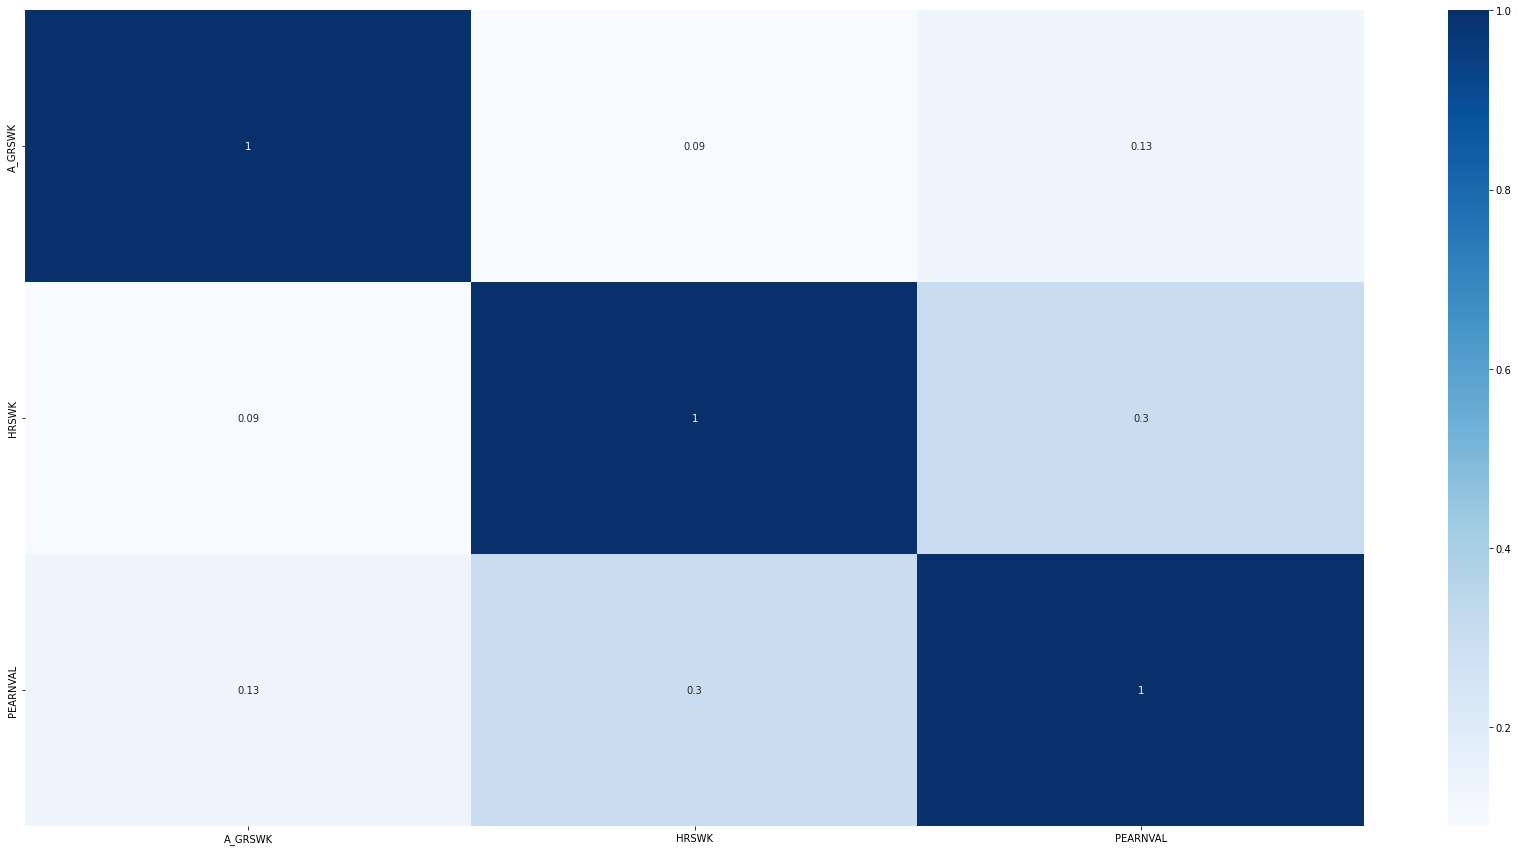

In [ ]:
# Correlation plot
correlation_df = asec_oes_final.filter(items=['A_GRSWK', 'HRSWK', 'PEARNVAL'], axis=1)

plt.figure(figsize=(30,15))
correlation_matrix = correlation_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='Blues')

In [ ]:
# Numerically looking at the correlations
corrs = correlation_df.corr().round(2).unstack().abs()
corrs = corrs[corrs < 1]
corrs.sort_values(ascending = False)

PEARNVAL  HRSWK       0.30
HRSWK     PEARNVAL    0.30
PEARNVAL  A_GRSWK     0.13
A_GRSWK   PEARNVAL    0.13
HRSWK     A_GRSWK     0.09
A_GRSWK   HRSWK       0.09
dtype: float64

None of these predictors appear to be highly correlated.

###Boxplots
We use boxplots to visualize the categorical variabe of occupational code against several continuous variables, including weekly earnings, total person's earnings, and weekly hours.

Text(0.5, 1.0, 'Weekly Earnings vs Coded Occupation')

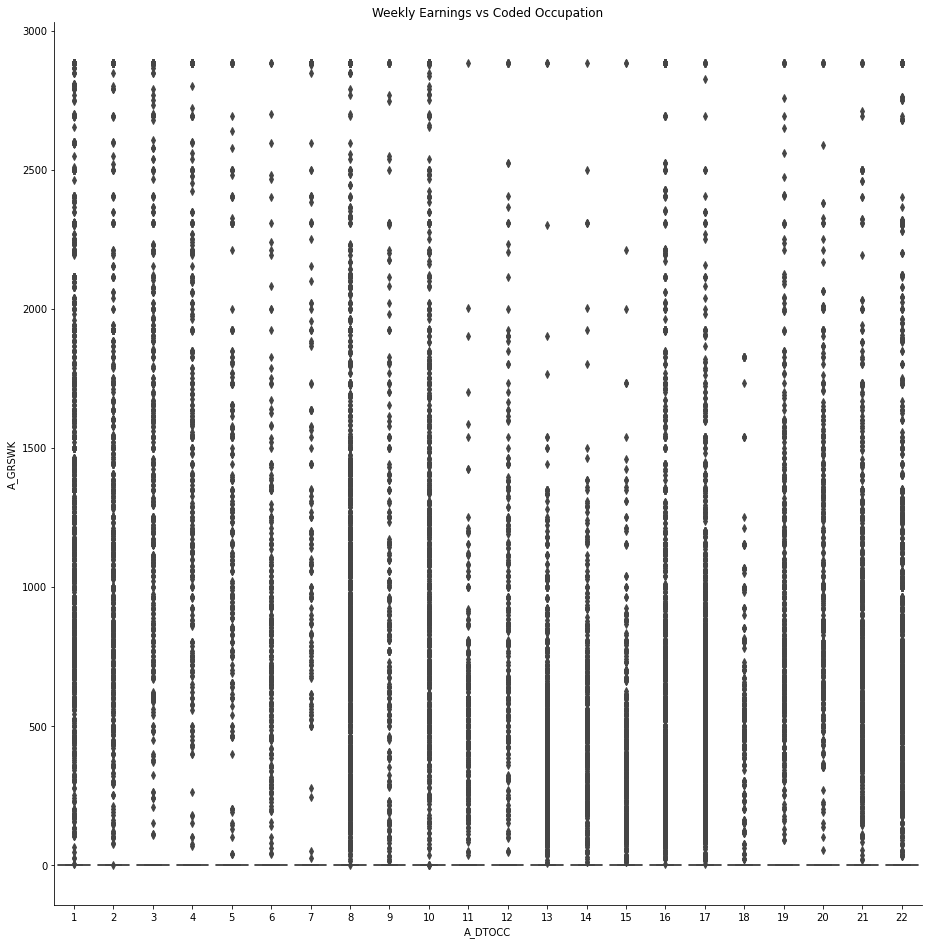

In [ ]:
sns.catplot(x="A_DTOCC", y="A_GRSWK", kind="box", data=asec_oes_final, height=13)
plt.title('Weekly Earnings vs Coded Occupation')

Text(0.5, 1.0, 'Total Persons Earning vs Coded Occupation')

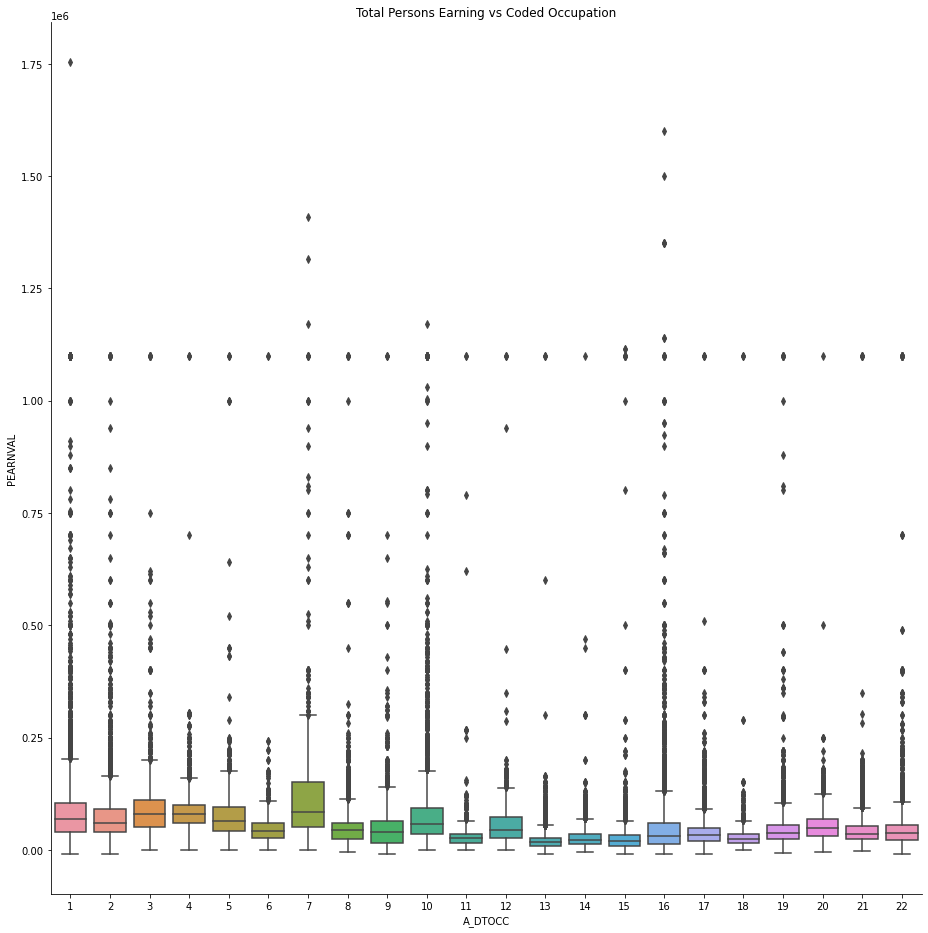

In [ ]:
sns.catplot(x="A_DTOCC", y="PEARNVAL", kind="box", data=asec_oes_final, height=13)
plt.title('Total Persons Earning vs Coded Occupation')

Text(0.5, 1.0, 'Weekly Hours Worked vs Coded Occupation')

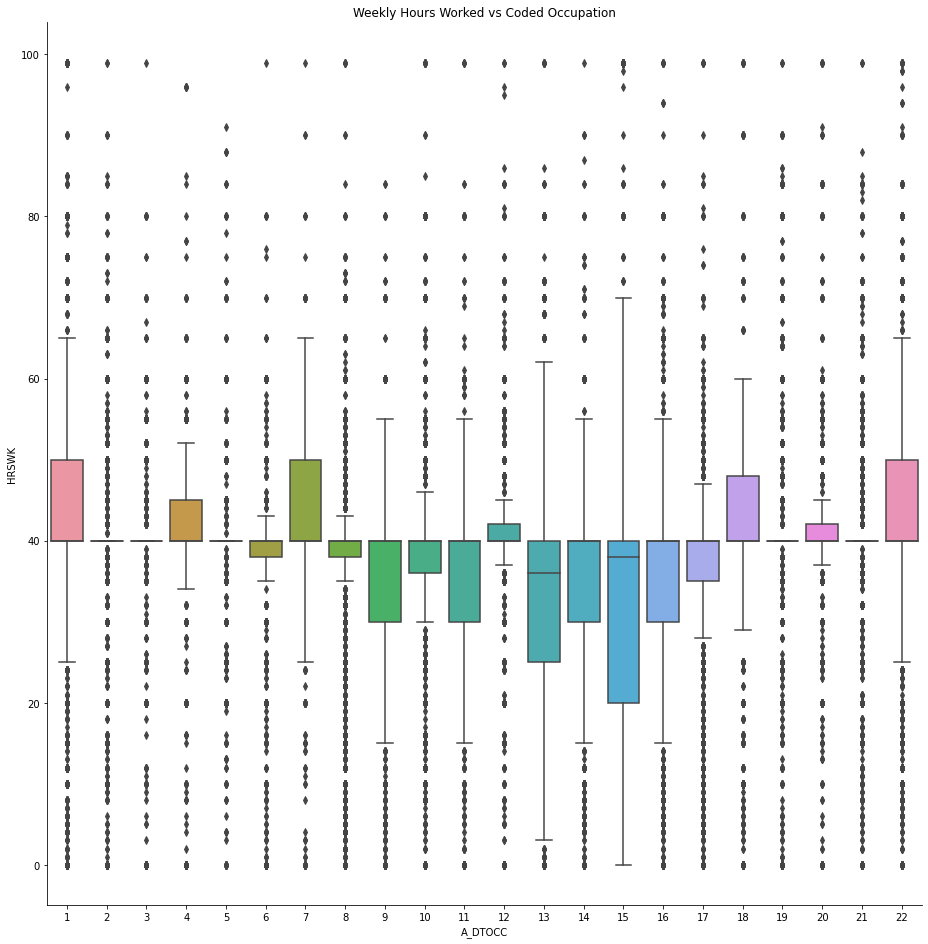

In [ ]:
sns.catplot(x="A_DTOCC", y="HRSWK", kind="box", data=asec_oes_final, height=13)
plt.title('Weekly Hours Worked vs Coded Occupation')

###Scatter Plots
We used a scatter plot to look at the relationships between sex, weekly earnings, and occupation.

Text(0.5, 1.0, 'Weekly Earnings vs Coded Occupation')

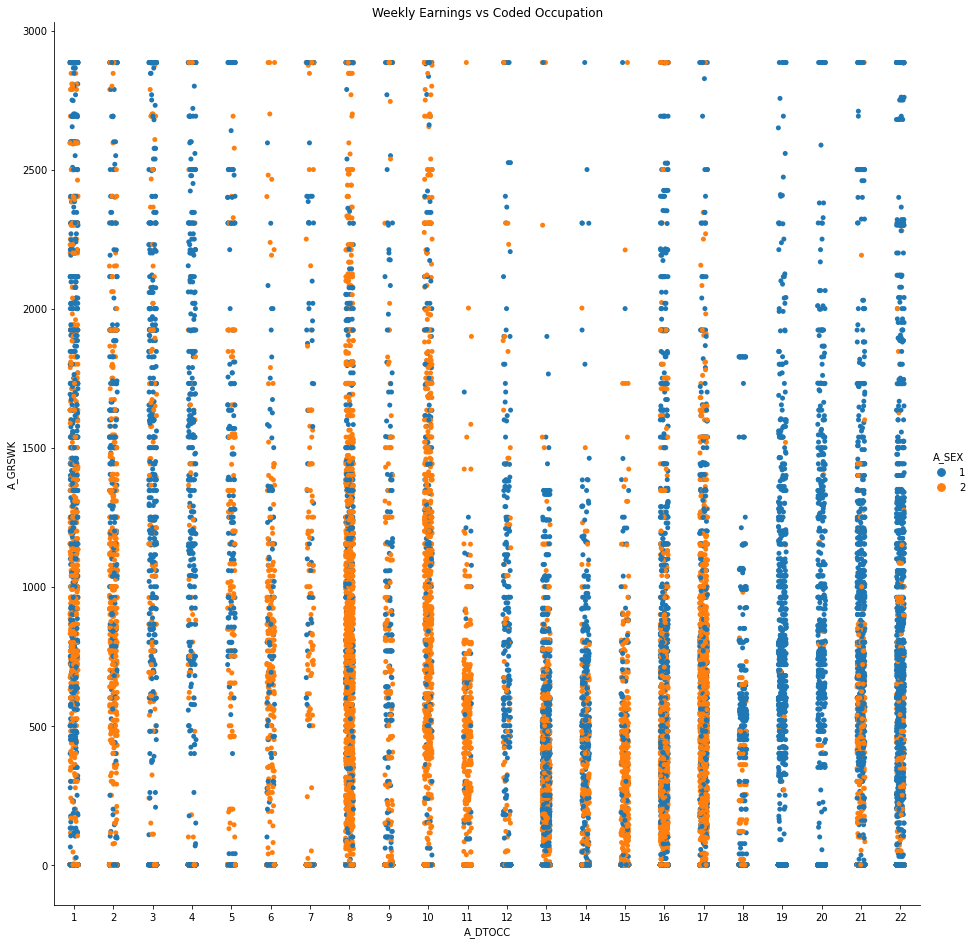

In [ ]:
sns.catplot(x='A_DTOCC', y='A_GRSWK', hue='A_SEX', data=asec_oes_final, height=13)
plt.title('Weekly Earnings vs Coded Occupation')

Text(0.5, 1.0, 'Weekly Earnings vs Coded Occupation')

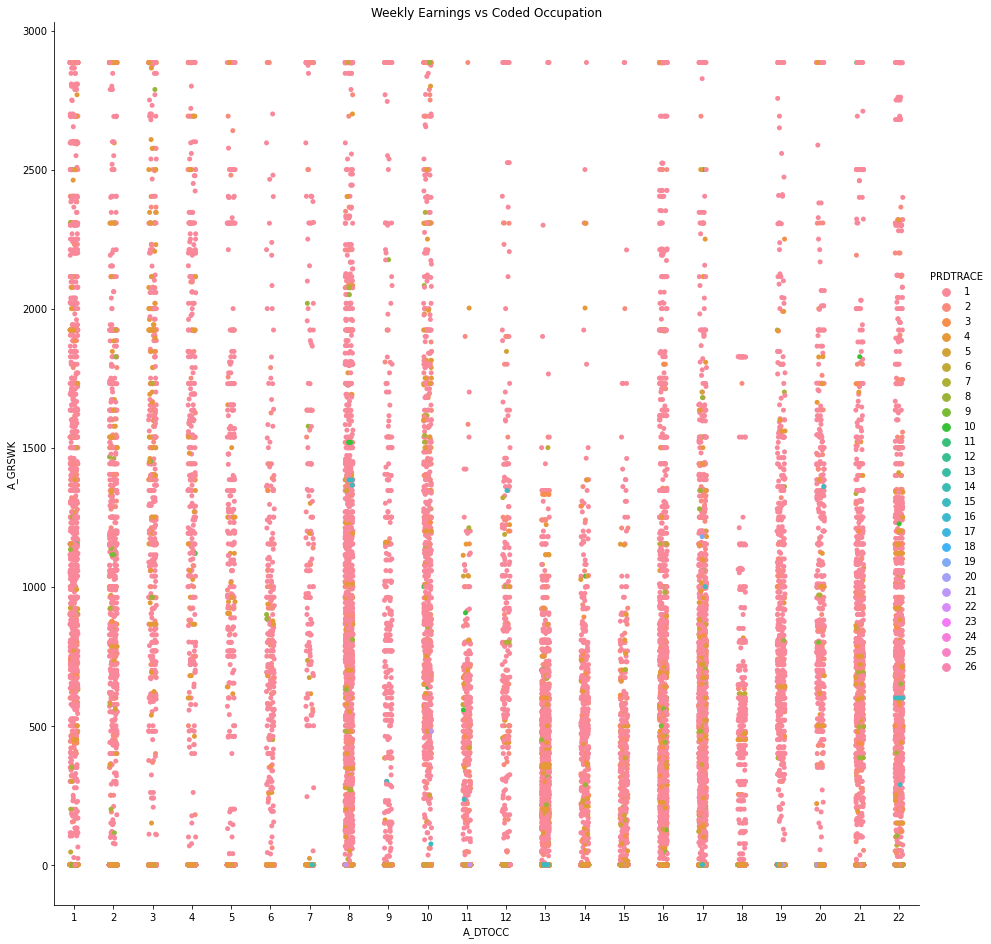

In [ ]:
sns.catplot(x='A_DTOCC', y='A_GRSWK', hue='PRDTRACE', data=asec_oes_final, height=13)
plt.title('Weekly Earnings vs Coded Occupation')

##Reflection
The data are not normally distributed, but do show some interesting trends between our variables of interest (sex, occupational group, earnings, race, hours worked, etc). Depending on the model implemented, we may need to return to EDA to explicitly check assumptions for the model.

# Data Processing / Models - MS-4 - Oct 29

- Determine which columns to get rid of after applying model.


# Data Visualization and Results - MS-5 - Nov 19

# Presentation and Conclusions - Final - Dec 3

